In [ ]:
import pandas as pd
df = pd.read_csv("AI_Job_Data.csv")
df['is_manager_or_director'] = df['Job titiles'].str.lower().str.contains('manager|director').astype(int)
df['AI Impact'] = df['AI Impact'].str.rstrip('%').astype(float)
df

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,is_manager_or_director
0,Communications Manager,98%,365,2546,0.143362,Communication & PR,1
1,Data Collector,95%,299,2148,0.139199,Data & IT,0
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical,0
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy,0
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare,0
...,...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT,0
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical,0
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy,1
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare,0


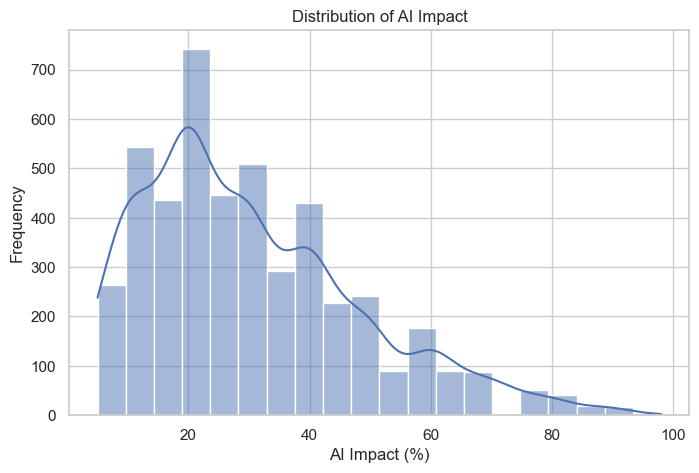

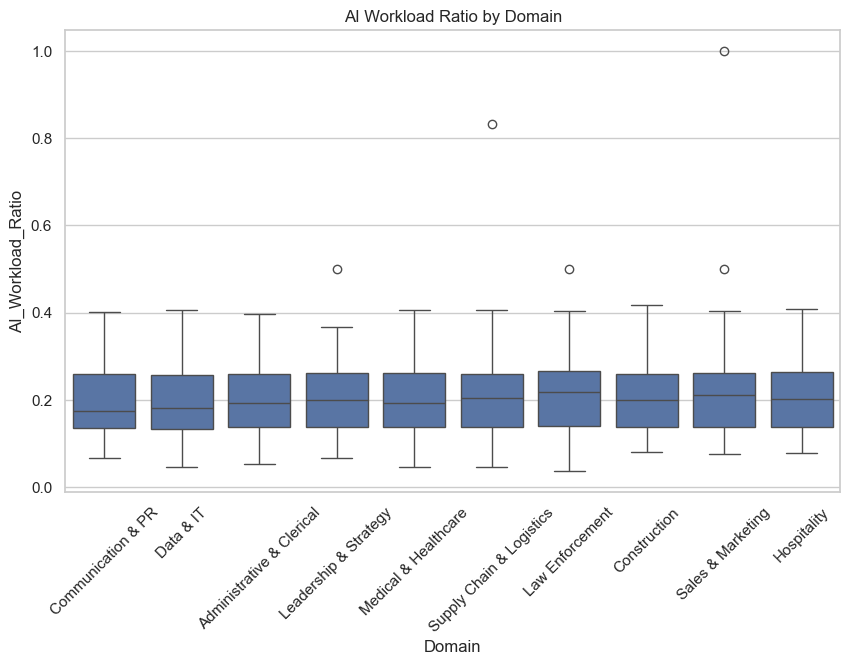

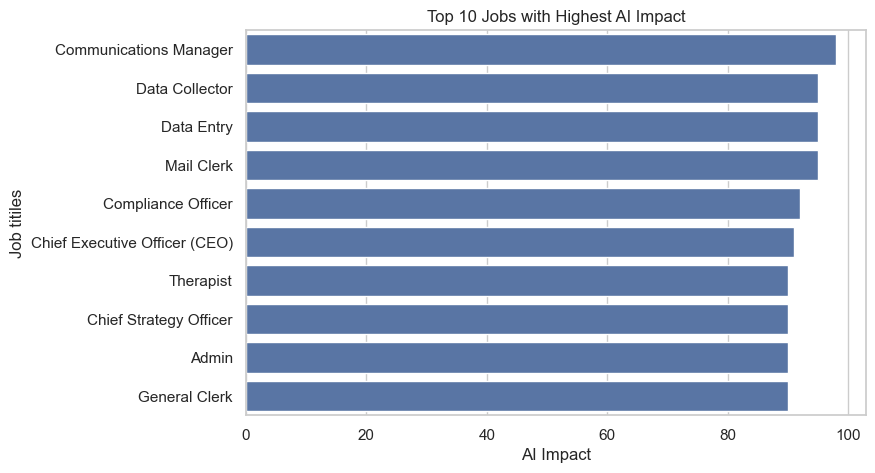

/Users/mihirjoshi/micromamba/lib/python3.9/site-packages/matplotlib/colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/Users/mihirjoshi/micromamba/lib/python3.9/site-packages/matplotlib/colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


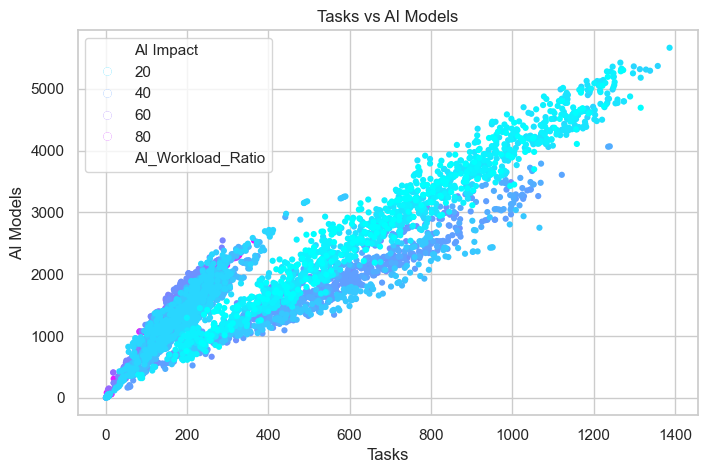

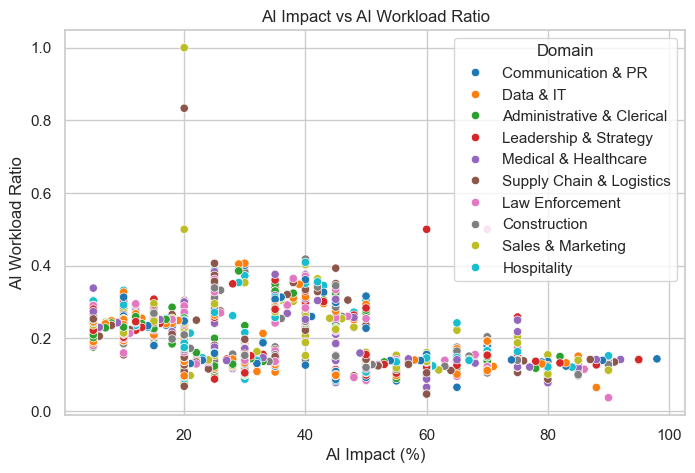

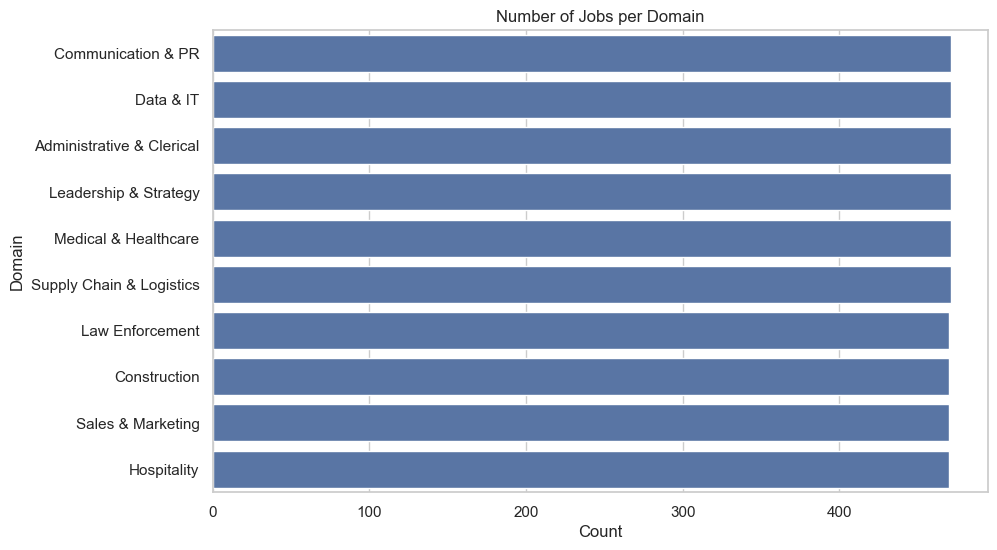

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame
# df = pd.read_csv('your_data.csv')

sns.set(style="whitegrid")

# 1. Distribution of AI Impact
plt.figure(figsize=(8, 5))
sns.histplot(df['AI Impact'].str.rstrip('%').astype(float), bins=20, kde=True)
plt.title('Distribution of AI Impact')
plt.xlabel('AI Impact (%)')
plt.ylabel('Frequency')
plt.show()

# 2. AI Workload Ratio by Domain
plt.figure(figsize=(10, 6))
sns.boxplot(x='Domain', y='AI_Workload_Ratio', data=df)
plt.xticks(rotation=45)
plt.title('AI Workload Ratio by Domain')
plt.show()

# 3. Top 10 Jobs with Highest AI Impact
df['AI Impact'] = df['AI Impact'].str.rstrip('%').astype(float)
top_jobs = df.nlargest(10, 'AI Impact')
plt.figure(figsize=(8, 5))
sns.barplot(x='AI Impact', y='Job titiles', data=top_jobs)
plt.title('Top 10 Jobs with Highest AI Impact')
plt.show()

# 4. Tasks vs AI Models
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Tasks', y='AI models', hue='AI Impact', size='AI_Workload_Ratio', data=df, palette='cool', sizes=(20, 200))
plt.title('Tasks vs AI Models')
plt.xlabel('Tasks')
plt.ylabel('AI Models')
plt.show()

# 5. AI Impact vs AI Workload Ratio
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AI Impact', y='AI_Workload_Ratio', hue='Domain', data=df, palette='tab10')
plt.title('AI Impact vs AI Workload Ratio')
plt.xlabel('AI Impact (%)')
plt.ylabel('AI Workload Ratio')
plt.show()

# 6. Jobs per Domain
plt.figure(figsize=(10, 6))
sns.countplot(y='Domain', data=df, order=df['Domain'].value_counts().index)
plt.title('Number of Jobs per Domain')
plt.xlabel('Count')
plt.ylabel('Domain')
plt.show()


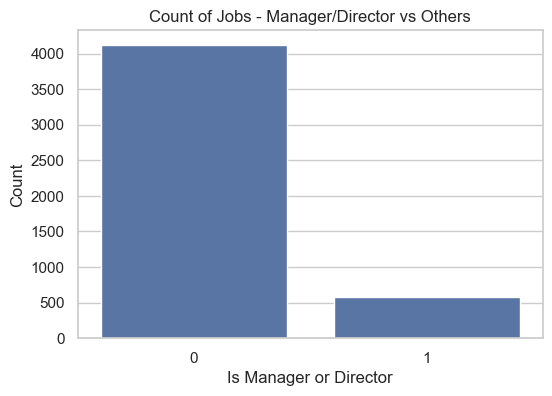

In [13]:
# 7. Countplot for is_manager_or_director
plt.figure(figsize=(6, 4))
sns.countplot(x='is_manager_or_director', data=df)
plt.title('Count of Jobs - Manager/Director vs Others')
plt.xlabel('Is Manager or Director')
plt.ylabel('Count')
plt.show()

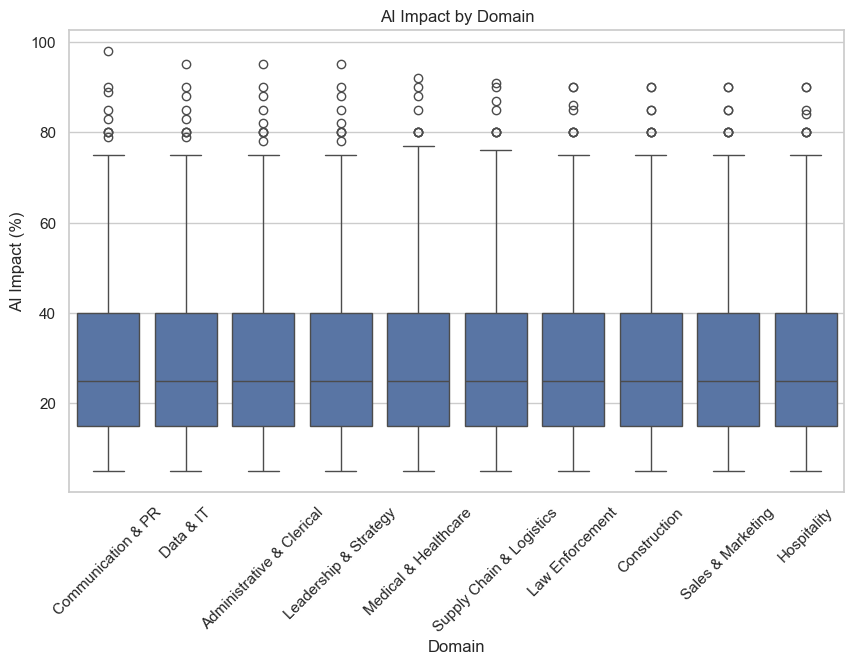

In [14]:
# 8. AI Impact by Domain
plt.figure(figsize=(10, 6))
sns.boxplot(x='Domain', y='AI Impact', data=df)
plt.xticks(rotation=45)
plt.title('AI Impact by Domain')
plt.xlabel('Domain')
plt.ylabel('AI Impact (%)')
plt.show()

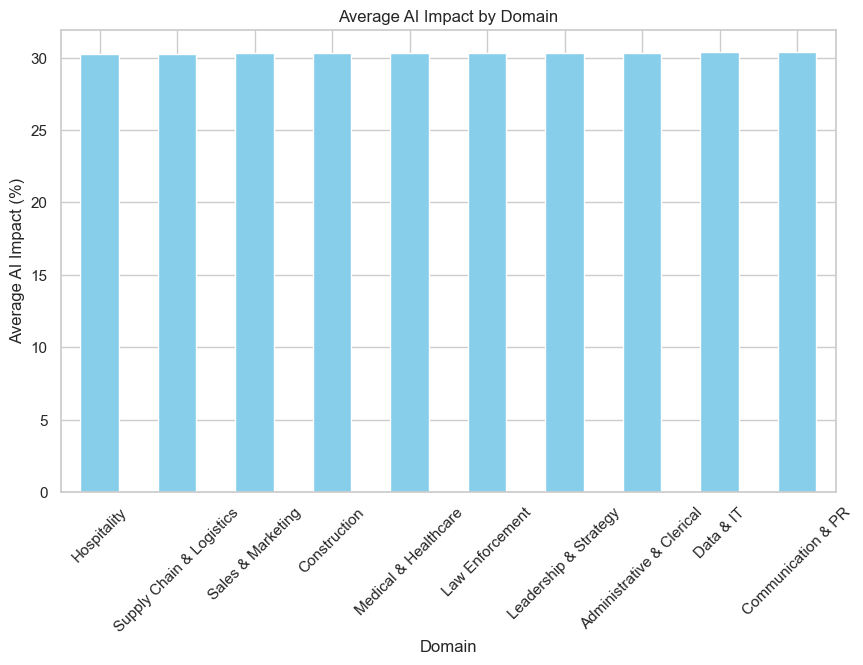

In [17]:
# AI Impact by Domain - Averages Bar Plot
plt.figure(figsize=(10, 6))
average_impact = df.groupby('Domain')['AI Impact'].mean().sort_values()
average_impact.plot(kind='bar', color='skyblue')
plt.title('Average AI Impact by Domain')
plt.xlabel('Domain')
plt.ylabel('Average AI Impact (%)')
plt.xticks(rotation=45)
plt.show()